##### AI TECH - Akademia Innowacyjnych Zastosowań Technologii Cyfrowych. Programu Operacyjnego Polska Cyfrowa na lata 2014-2020
<hr>

## <br>
<br>
<br>
<br>
<br>
<br>
<br>
<center>
    <h1 style = "font-size:48px; font-weight:normal"><b>AI</b>-TECH</h1>
    <br>
<br>
<br>
<br>
    <h1 style = "font-size:24px; font-weight:normal">Przykład 3 DO LABORATORIUM 4</h1>
    <h1 style = "font-size:24px">z UCZENIA MASZYNOWEGO</h1>
    <h1 style = "font-size:24px">Metoda gradientu prostego, perceptron</h1>
    <h1 style = "font-size:24px">Tomasz Neumann</h1>
    <h3 style = "font-size:21px">SGDRegressor</h3>
</center>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
    </body>
    </html>

![stopka.svg](stopka.svg)

<center>
Projekt współfinansowany ze środków Unii Europejskiej w ramach Europejskiego Funduszu Rozwoju Regionalnego 
Program Operacyjny Polska Cyfrowa na lata 2014-2020,
Oś Priorytetowa nr 3 "Cyfrowe kompetencje społeczeństwa" Działanie  nr 3.2 "Innowacyjne rozwiązania na rzecz aktywizacji cyfrowej" 
Tytuł projektu:  „Akademia Innowacyjnych Zastosowań Technologii Cyfrowych (AI Tech)”
    </center>

<hr>

# 1. Przykład 3

Zastosowanie metody Stochastic Gradient Descent (SGD) do klasyfikatora liniowego lub regresora zapewnia efektywny estymator problemów związanych z klasyfikacją i regresją.

Scikit-learn API udostępnia klasę SGDRegressor do implementacji metody SGD dla problemów regresji. Regresor SGD stosuje regularyzowany model liniowy z uczeniem SGD w celu zbudowania estymatora. Są to regulatory L1, L2 lub Elastic Net dodane do funkcji strat w celu zmniejszenia parametrów modelu. Regresor SGD działa dobrze z wielkoskalowymi zbiorami danych.
Spróbujmy więc dopasowywać i przewidywać dane regresji przy użyciu klasy SGDRegressor modułu Scikit-learn. W tym celu rozpoczynamy od dołaczenia odpowiednich bibliotek


In [1]:
from sklearn.linear_model import SGDRegressor
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import scale
import matplotlib.pyplot as plt 

oraz wygenerowania losowych danych wejściowych przy użyciu klasy <i>make_regression()</i> tak, aby zbiór danych zawierał 10000 próbek o 30 cechach.

In [2]:
x, y = make_regression(n_samples=1000, n_features=30, noise=21)

W celu poprawienia dokładności modelu, dane x i y zostaną przeskalowane, a następnie podzielone na zbiór zbiór treningowy i testowy, gdzie zbiór testowy będzie stanowił 15% wszystkich próbek.

In [3]:
x = scale(x)
y = scale(y)
xtrain, xtest, ytrain, ytest=train_test_split(x, y, test_size=0.15)

Następnie można zbudować model regresora za pomocą klasy SGDRegressor

In [4]:
sgdr = SGDRegressor()
print(sgdr)

SGDRegressor()


po czym można przystapić do wytrenowania i sprawdzania jakości treningu jak i wyuczonych wag.

In [5]:
sgdr.fit(xtrain, ytrain)
score = sgdr.score(xtrain, ytrain)
print("R-squared:", score)
#wyświetlenie macierzy wag
sklearn_w=sgdr.coef_
print("Macierz wag: ", sklearn_w)

R-squared: 0.9849865660499959
Macierz wag:  [ 2.52646756e-03  3.37863189e-01  1.30382137e-03 -2.70954816e-03
  7.26391250e-03  7.03563589e-05 -3.35560606e-04  2.30359697e-02
  4.87860084e-01  3.18594969e-01 -3.03043653e-03 -3.72812588e-03
  3.22411860e-03 -5.31253132e-03  1.89923632e-01  6.94039159e-02
 -5.34282894e-03 -1.99744365e-03  6.20816075e-03 -6.30042709e-03
 -1.33196497e-03 -5.79433751e-03  4.92393459e-05  1.69995678e-01
  4.38419164e-01  1.87901846e-03 -4.70735631e-03  1.02103433e-01
  1.58439379e-03  5.64585019e-01]


Można także w tym przypadku zastosować walidację krzyżową i sprawdzić dokładność wytrenowanego modelu.

In [6]:
cv_score = cross_val_score(sgdr, x, y, cv = 10)
print("CV mean score: ", cv_score.mean())

CV mean score:  0.9834197914991274


Aktualnie, można dokonać predykcji na wytrenowanym modelu oraz sprawdzić dokładność tych prognoz za pomocą metryki MSE i RMSE.

In [7]:
ypred = sgdr.predict(xtest)

mse = mean_squared_error(ytest, ypred)
print("MSE: ", mse)
print("RMSE: ", mse*(1/2.0)) 

MSE:  0.016353513319580577
RMSE:  0.008176756659790289


Ostatecznie można zwizualizować dane oryginalne oraz te uzyskane z predykcji.

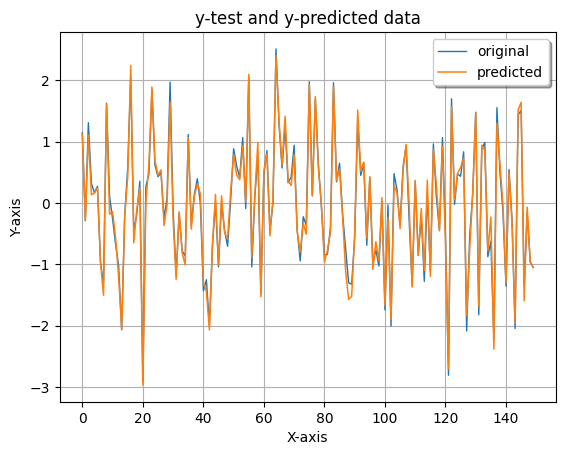

In [8]:
x_ax = range(len(ytest))
plt.plot(x_ax, ytest, linewidth=1, label="original")
plt.plot(x_ax, ypred, linewidth=1.1, label="predicted")
plt.title("y-test and y-predicted data")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

# Zadania do wykonania

<p><b>Zadanie 1</b></p>
Przeprowadź eksperymenty dla SGDRegressor dla zbioru danych zaczytanych z load_diabetes (<a>https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html#sklearn.datasets.load_diabetes</a>). Zbiór zawiera dane 442 pacjentów, z czego w pierwszych 10 jest informacja zmiennoprzecinkowa o (w kolejności) wieku, płci wskaźniku masy ciała, średnie cisnienie krwi i sześć pomiarów surowicy krwi, a w ostatniej kolumnie znajduje się ilościowa progresja choroby rok po wizycie początkowej.


![stopka.svg](stopka.svg)

In [37]:
from sklearn.datasets import load_diabetes
import pandas as pd
import numpy as np
from itertools import combinations
X,y  = load_diabetes(return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state=42)
penalties = ['l2', 'l1', 'elasticnet']
l_rate_types = ['constant', 'optimal', 'invscaling', 'adaptive']
learning_rates = np.arange(0.01, 1.1, 0.1)
predictions = []
data = pd.DataFrame(columns=["Penalty", "Learning Type","Learning Rate", "MSE", "Score"])

for penalty in penalties:
    for l_rate_type in l_rate_types:
        for l_rate in learning_rates:
            sgdreg = SGDRegressor(random_state=42, penalty=penalty, learning_rate=l_rate_type, eta0=l_rate, max_iter=2000)
            sgdreg.fit(X_train,y_train)
            score = sgdreg.score(X_train,y_train)
            pred = sgdreg.predict(X_test)
            predictions.append(pred)
            mse = mean_squared_error(y_test,pred)
            data.loc[len(data)] = [penalty, l_rate_type,l_rate, mse, score]

data.sort_values(by="Score", ascending=False).head(10)
#diabetes = pd.DataFrame(data=X, columns = ['Wiek', 'Plec', 'Masa ciala', 'Srednie Cisnienie krwi', 'Pomiar krwi 1','Pomiar krwi 2','Pomiar krwi 3','Pomiar krwi 4','Pomiar krwi 4'])


c:\Users\blaze\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1608: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\blaze\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1608: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\blaze\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1608: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\blaze\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1608: ConvergenceWarning: Maximum number of iteration reached before convergence. Co

,Penalty,Learning Type,Learning Rate,MSE,Score
86,l1,adaptive,0.91,2891.098883,0.523523
87,l1,adaptive,1.01,2889.524982,0.523502
85,l1,adaptive,0.81,2890.641517,0.523489
84,l1,adaptive,0.71,2889.776215,0.523438
83,l1,adaptive,0.61,2888.241040,0.523379
82,l1,adaptive,0.51,2885.882278,0.523291
81,l1,adaptive,0.41,2882.463266,0.523144
80,l1,adaptive,0.31,2878.298016,0.523102
130,elasticnet,adaptive,0.91,2877.839574,0.522905
129,elasticnet,adaptive,0.81,2877.956935,0.522899


*SCORE*

In [38]:
data.sort_values(by="Score", ascending=False).head(15)

,Penalty,Learning Type,Learning Rate,MSE,Score
86,l1,adaptive,0.91,2891.098883,0.523523
87,l1,adaptive,1.01,2889.524982,0.523502
85,l1,adaptive,0.81,2890.641517,0.523489
84,l1,adaptive,0.71,2889.776215,0.523438
83,l1,adaptive,0.61,2888.241040,0.523379
82,l1,adaptive,0.51,2885.882278,0.523291
81,l1,adaptive,0.41,2882.463266,0.523144
80,l1,adaptive,0.31,2878.298016,0.523102
130,elasticnet,adaptive,0.91,2877.839574,0.522905
129,elasticnet,adaptive,0.81,2877.956935,0.522899


*MSE*

In [40]:
data.sort_values(by="MSE", ascending=True).head(15)

,Penalty,Learning Type,Learning Rate,MSE,Score
71,l1,invscaling,0.51,2859.733422,0.510787
115,elasticnet,invscaling,0.51,2860.689333,0.509408
34,l2,adaptive,0.11,2860.826601,0.517552
27,l2,invscaling,0.51,2860.962141,0.509149
122,elasticnet,adaptive,0.11,2861.184920,0.517795
35,l2,adaptive,0.21,2863.001527,0.521717
70,l1,invscaling,0.41,2863.589184,0.506966
78,l1,adaptive,0.11,2864.014821,0.519057
123,elasticnet,adaptive,0.21,2864.178835,0.521893
114,elasticnet,invscaling,0.41,2866.092572,0.505400
